In [3]:
from datasets import load_dataset, Dataset, DatasetDict
import matplotlib.pyplot as plt
from transformers import(
                         AutoTokenizer, AutoModel,RobertaTokenizer,
                         AutoModelForSequenceClassification,
                         RobertaForSequenceClassification,
                         AutoConfig, TrainingArguments, Trainer
                        )
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score



In [ ]:
dataset = load_dataset("dair-ai/emotion")

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [4]:
df = dataset['train'].to_pandas()
df

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


In [5]:
label_name = dataset['train'].features
display(label_name)
print(f" these are labels :\n {label_name['label'].names}")

{'text': Value('string'),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])}

 these are labels :
 ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']


In [6]:
label_names = dataset['train'].features['label'].names
label_names

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [7]:
df['label_text'] = df['label'].apply(lambda x: label_names[x])
display(df.head())

,text,label,label_text
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [8]:
label_counts = df['label_text'].value_counts(ascending=True)
label_counts

,count
label_text,
surprise,572
love,1304
fear,1937
anger,2159
sadness,4666
joy,5362


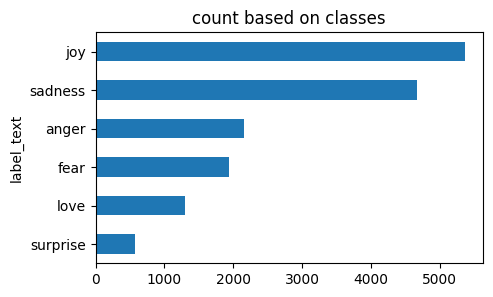

In [ ]:
plt.figure(figsize=(5, 3))
plt.title('count based on classes')
label_counts.plot.barh()
plt.show()

In [ ]:
model_checkpoint = 'roberta-base'
tokenizer = RobertaTokenizer.from_pretrained(model_checkpoint)

In [10]:
train, test = train_test_split(df, test_size=0.3, stratify=df['label_text'])
test, validation = train_test_split(test, test_size=1/3, stratify=test['label'])

validation.shape, test.shape, train.shape

((1600, 3), (3200, 3), (11200, 3))

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [11]:
dataset = DatasetDict({
     'train': Dataset.from_pandas(train, preserve_index=False),
     'test': Dataset.from_pandas(test, preserve_index=False),
     'validation': Dataset.from_pandas(validation, preserve_index=False)
})
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 11200
    })
    test: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 3200
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 1600
    })
})

In [ ]:
dataset['train'][10]

{'text': 'i feel very contented just sitting beside him without even uttering a single word',
 'label': 1,
 'label_text': 'joy'}

In [18]:
def tokenize(batch):
  return tokenizer(batch['text'], padding=True, truncation=True)

tokenize(dataset['train'][:3])

{'input_ids': [[0, 118, 619, 14, 5, 521, 40, 28, 55, 1800, 11, 5, 8171, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 118, 67, 619, 5800, 8, 7758, 8, 10513, 142, 52, 3486, 1268, 197, 33, 7, 109, 24, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 118, 2813, 939, 56, 10, 18236, 8847, 14, 2771, 5, 38769, 8, 29841, 22887, 21862, 3245, 25283, 14215, 118, 8, 5, 12343, 18236, 939, 619, 101, 209, 80, 10230, 35734, 5, 1423, 179, 8, 1423, 1097, 50, 11, 42, 403, 5, 4045, 8, 14065, 4405, 2380, 9, 5, 1969, 1035, 375, 281, 2]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
encoded = dataset.map(tokenize, batched=True, batch_size=None)

In [ ]:
encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 11200
    })
    test: Dataset({
        features: ['text', 'label', 'label_text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3200
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1600
    })
})

In [ ]:
model = AutoModel.from_pretrained(model_checkpoint)
model

In [21]:
model.config.id2label, model.config.label2id

({0: 'LABEL_0', 1: 'LABEL_1'}, {'LABEL_0': 0, 'LABEL_1': 1})

In [22]:
label2id = {label: i for i, label in enumerate(label_names)}
id2label = {i: label for i, label in enumerate(label_names)}
label2id, id2label

({'sadness': 0, 'joy': 1, 'love': 2, 'anger': 3, 'fear': 4, 'surprise': 5},
 {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'})

In [23]:
config = AutoConfig.from_pretrained(model_checkpoint, label2id=label2id, id2label=id2label)
model = RobertaForSequenceClassification.from_pretrained(model_checkpoint, config=config)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [24]:
batch_size = 64
training_dir = 'roberta_base'
training_args = TrainingArguments(output_dir=training_dir,
                                  overwrite_output_dir=True,
                                  num_train_epochs=5,
                                  learning_rate=2e-5,
                                  per_device_eval_batch_size=batch_size,
                                  per_device_train_batch_size=batch_size,
                                  weight_decay=0.01,
                                  eval_strategy='epoch',
                                  disable_tqdm=False)

In [25]:
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average='weighted')
  acc = accuracy_score(labels, preds)
  return {"accuracy":acc, 'f1 score': f1}

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=encoded['train'],
    eval_dataset=encoded['validation'],
    tokenizer=tokenizer
)
trainer

In [ ]:
trainer.train()

###TrainOutput(global_step=875, training_loss=0.31117589024135045, metrics={'train_runtime': 934.5234, 'train_samples_per_second': 59.924, 'train_steps_per_second': 0.936, 'total_flos': 2532534859008000.0, 'train_loss': 0.31117589024135045, 'epoch': 5.0})


In [28]:
trainer.save_model('roberta_classification')

In [31]:
from transformers import pipeline

classifier = pipeline("text-classification", model="roberta_classification", tokenizer="roberta_classification")
texts = ["This is great!", "I feel lonely", "I hate it."]
results = classifier(texts)
print(results)


Device set to use cuda:0


[{'label': 'joy', 'score': 0.9964421391487122}, {'label': 'sadness', 'score': 0.997150719165802}, {'label': 'anger', 'score': 0.9469196796417236}]
